# Support-Vector Machine on Fashion MNIST
This algorithm classifies data points using optimal hyperplane for categorization. We have tried to get accuracy score with two kernels: Radial Basis Function (RBF) and Polynomial

First, we import all necessary libraries. We will accuracy_score to evaluate accuracy of our algorithm, SVC and Pipeline for SVM algorithm. This is described in details in Methods section. Then we import our data and split it to train and test sample (6000 / 1000 by default)

In [ ]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import SVC

mnist_fashion_data = keras.datasets.fashion_mnist # import neccessary Fashion dataset
(X_train_initial, y_train), (X_test_initial, y_test) = mnist_fashion_data.load_data() 

Define class names for our data set. It includes types of clothes

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Then we normalize our train and test images, and convert 2d array to 1d array for practical purposes

In [ ]:
X_test_initial=X_test_initial/np.float32(255)
X_train_initial=X_train_initial/np.float32(255)

def dimension_converter(np_array):
  arr = [] #create empty 1d array
  dimension = np_array.shape
  for i in range(dimension[0]):
    arr.append(np_array[i].flatten()) #return a copy of np_array in  1 dimension and append it to initially empty array
  arr = np.array(arr)
  return arr

X_train = dimension_converter (X_train_initial)
X_test = dimension_converter (X_test_initial)



Next we conduct principal component analysis with 50 principal components. More on it can be found in Methods section

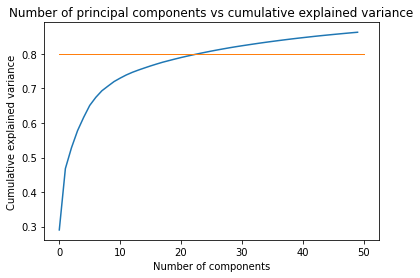

In [ ]:
pca = PCA(n_components=50)
pca_fit = pca.fit_transform(X_train)
variances =pca.explained_variance_ratio_

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Number of principal components vs cumulative explained variance')
plt.plot(np.cumsum(variances))
plt.plot([0,50],[0.8,0.8],lw=1)
plt.show()

# Employing SVM with different kernels

KNN with RBF kernel. We use hyperparameter C = 100, and gamma = 0.1. First, we train model with 25 components then we fit it , get predicted labels and find accuracy score. Same algorithm is done with polynomial kernel but we have looked at polynomials with degree 3 and 5

In [ ]:
p_svm = Pipeline([('pca', PCA(n_components=25)),('clf',SVC(C=100,kernel='rbf',gamma=0.1))])
p_svm.fit(X_train, y_train)
p_predict = p_svm.predict(X_test)

In [ ]:
print('Accuracy score of SVM with rbf is: ' + str(accuracy_score(p_predict, y_test)))
print('Precision score of SVM with rbf is:  ' + str(precision_score(y_test,p_predict, average='macro')))
print('Recall score of SVM with rbf is:  ' + str(recall_score(y_test,p_predict, average='macro')))

Accuracy score of SVM with rbf is: 0.8632
Precision score of SVM with rbf is:  0.863648919837242
Recall score of SVM with rbf is:  0.8632


In [ ]:
p_svm = Pipeline([('pca', PCA(n_components=25)),('clf',SVC(C=100,kernel='poly',degree=3))])
p_svm.fit(X_train, y_train)
p_predict = p_svm.predict(X_test)

In [ ]:
print('Accuracy score of SVM with poly and degree 3 is: ' + str(accuracy_score(p_predict, y_test)))
print('Precision scoreof SVM with poly and degree 3 is:  ' + str(precision_score(y_test,p_predict, average='macro')))
print('Recall score oof SVM with poly and degree 3 is:  ' + str(recall_score(y_test,p_predict, average='macro')))

Accuracy score of SVM with poly and degree 3 is: 0.8795
Precision scoreof SVM with poly and degree 3 is:  0.8794626909771133
Recall score oof SVM with poly and degree 3 is:  0.8795


In [ ]:
p_svm = Pipeline([('pca', PCA(n_components=25)),('clf',SVC(C=100,kernel='poly',degree=5))])
p_svm.fit(X_train, y_train)
p_predict = p_svm.predict(X_test)

In [ ]:
print('Accuracy score of SVM with poly and degree 5 is: ' + str(accuracy_score(p_predict, y_test)))
print('Precision scoreof SVM with poly and degree 5 is:  ' + str(precision_score(y_test,p_predict, average='macro')))
print('Recall score oof SVM with poly and degree 5 is:  ' + str(recall_score(y_test,p_predict, average='macro')))

Accuracy score of SVM with poly and degree 5 is: 0.8693
Precision scoreof SVM with poly and degree 5 is:  0.8713001139257083
Recall score oof SVM with poly and degree 5 is:  0.8693
